# Pillow 사용법

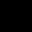

In [1]:
import numpy as np
from PIL import Image

# 그림은 3차원 배열임
# 그림 픽셀에 각 단일축은 0 ~ 255의 값을 가짐
data = np.zeros([32, 32, 3], dtype=np.uint8)
image = Image.fromarray(data, 'RGB')
image


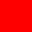

In [2]:
data[:, :] = [255, 0, 0]
image = Image.fromarray(data, 'RGB')
image


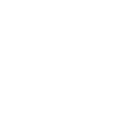

In [3]:
data = np.zeros([128, 128, 3], dtype=np.uint8)

data[:, :] = [255, 255, 255]
image = Image.fromarray(data, 'RGB')
image


In [4]:
path = 'data/pillow_practice.png'
image = Image.open(path)

In [5]:
print(image.width, image.height)

620 465


In [6]:
image.convert("RGB").save('data/pillow_practice.jpg')

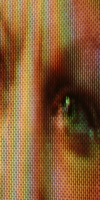

In [7]:
image.resize((100,200))

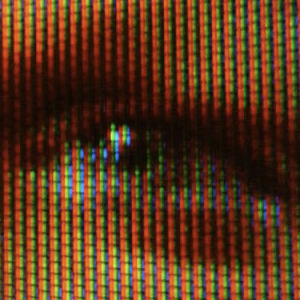

In [8]:
image.crop((300,100,600,400))

# Pillow를 활용한 데이터 전처리

In [9]:
import os
import pickle

path = './data/cifar-100-python'
train_file_path = os.path.join(path, 'train')

# pickle로 압축된 데이터 가져오기
with open(train_file_path, 'rb') as f:
    train = pickle.load(f, encoding='bytes')

print(type(train))
#print(train)   # 혹시 내용이 궁금하다면 주석을 풀고 실행해 보세요.

<class 'dict'>


In [10]:
# 키값만 보기
train.keys()

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])

In [11]:
# 타입 확인
type(train[b'filenames'])

list

In [12]:
# 파일 이름 확인
train[b'filenames'][0:5]

[b'bos_taurus_s_000507.png',
 b'stegosaurus_s_000125.png',
 b'mcintosh_s_000643.png',
 b'altar_boy_s_001435.png',
 b'cichlid_s_000031.png']

In [13]:
# 데이터 형태 확인
train[b'data'][0:5]

array([[255, 255, 255, ...,  10,  59,  79],
       [255, 253, 253, ..., 253, 253, 255],
       [250, 248, 247, ..., 194, 207, 228],
       [124, 131, 135, ..., 232, 236, 231],
       [ 43,  32,  87, ...,  60,  29,  37]], dtype=uint8)

In [14]:
# 1차원 배열 형태로 저장된 것을 확인함
train[b'data'][0].shape

(3072,)

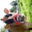

In [21]:
# 3차원 데이터 값으로 변경함
# rgb 순서대로 입력이 됬을 것이고
# order C로 하게 되면 순서가 꼬이게 됨
image_data = train[b'data'][0].reshape([32, 32, 3], order='F')   # order를 주의하세요!!
image = Image.fromarray(image_data)    # Pillow를 사용하여 Numpy 배열을 Image객체로 만들어서
image    # 화면에 띄워 봅시다!!

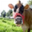

In [27]:
image_data = image_data.swapaxes(0, 1)
image = Image.fromarray(image_data)
image

In [23]:
import os
import pickle
from PIL import Image
import numpy
from tqdm import tqdm

dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/cifar-100-python'
train_file_path = os.path.join(dir_path, 'train')

# image를 저장할 cifar-100-python의 하위 디렉토리(images)를 생성합니다. 
images_dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/cifar-images'
if not os.path.exists(images_dir_path):
    os.mkdir(images_dir_path)  # images 디렉토리 생성

# 32X32의 이미지 파일 50000개를 생성합니다. 
with open(train_file_path, 'rb') as f:
    train = pickle.load(f, encoding='bytes')
    for i in tqdm(range(len(train[b'filenames']))):
        #

SyntaxError: unexpected EOF while parsing (<ipython-input-23-84598f0896f6>, line 19)